In [1]:
#Лабораторная работа 2 
# Вариант 1
# Подключение библиотек
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Для отображения на графике области принятия решения - готовую функцию, который на вход передают объект classifier
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    x1, x2 = np.meshgrid(xx, yy)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(x1,
                    x2,
                    decision_values.reshape(x1.shape),
                    levels=fill_levels,
                    colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(x1,
                   x2,
                   decision_values.reshape(x1.shape),
                   levels=levels,
                   colors='black')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

Координаты точек: 
[[ -9.4383967    2.85736287]
 [ -8.51188005   6.27823641]
 [ -9.13949465   3.63954101]
 [-12.37089043   7.15594338]
 [ -8.91150743   5.93048649]
 [ -9.54177266   3.84185898]
 [-10.90214655   2.04849828]
 [ -9.50825238   7.74690079]
 [ -7.00867273   3.01451428]
 [ -9.70678044   7.57851126]
 [-10.37004706   3.06762603]
 [ -7.36974408   2.34416931]
 [ -9.27756446   3.32067295]
 [ -6.7484923    3.58902355]
 [-10.17439185   2.344658  ]]
Метки класса: 
[1 0 0 0 0 1 1 0 1 0 1 1 1 1 1]


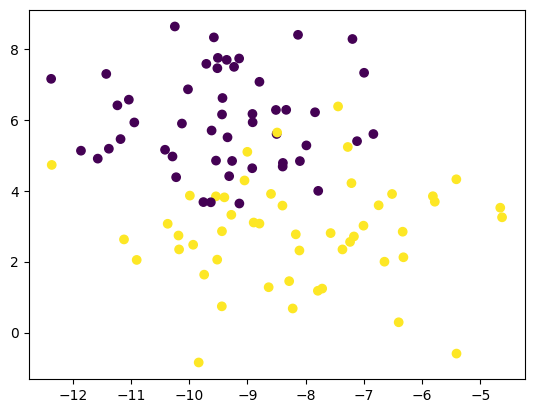

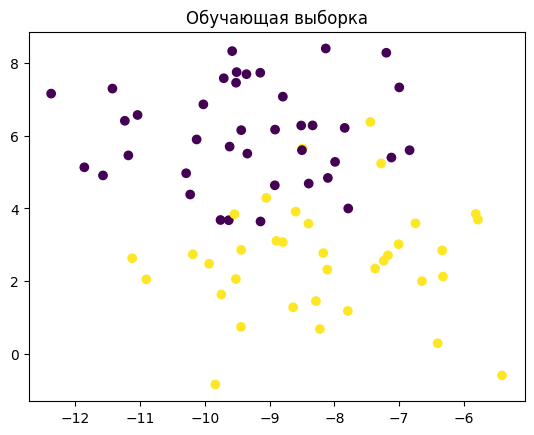

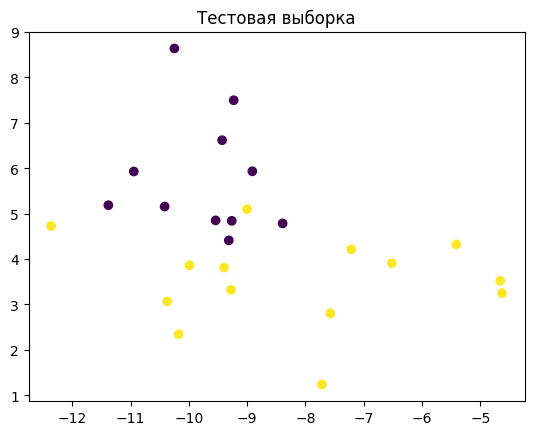

Prediction and test: 
[1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0]
[1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0]
Confusion matrix: 
[[10  1]
 [ 5  9]]
Accuracy score:  0.76


In [3]:
# Генерация выборки

X, y = make_blobs( centers= 2, cluster_std= 1.5,random_state=34)
# Массивы X и y
print('Координаты точек: ')
print(X[:15])
print('Метки класса: ')
print(y[:15])

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=34)

# Разбиение выборки 75% обучающегося и  25% тестового множества
plt.title('Обучающая выборка')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

plt.title('Тестовая выборка')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

# Обучение модели и классификация
# Импорт метода ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# Создание переменной  - модель классификатора
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
# Обучение модели 
knn.fit(X_train, y_train)
# Оценка качества
prediction = knn.predict(X_test)
# Вывод результатов
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))


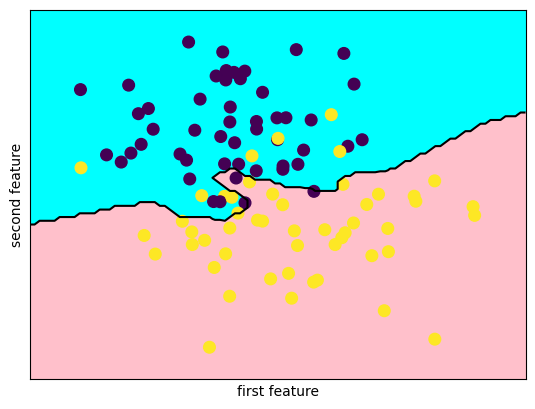

In [4]:
# Метод ближайших соседей (3)
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# Обучение модели
knn.fit(X_train, y_train)
# Оценка качества
prediction = knn.predict(X_test)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

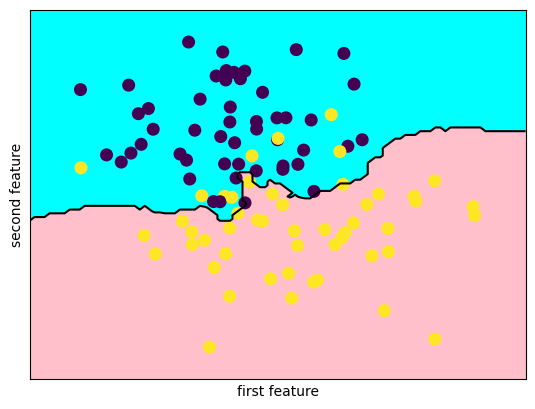

In [5]:
# Метод ближайших соседей (5)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# Обучение модели
knn.fit(X_train, y_train)
# Оценка качества
prediction = knn.predict(X_test)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

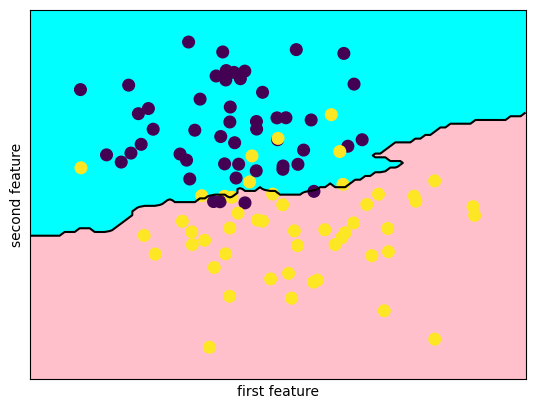

In [6]:
# Метод ближайших соседей (9)
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
# Обучение модели
knn.fit(X_train, y_train)
# Оценка качества
prediction = knn.predict(X_test)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

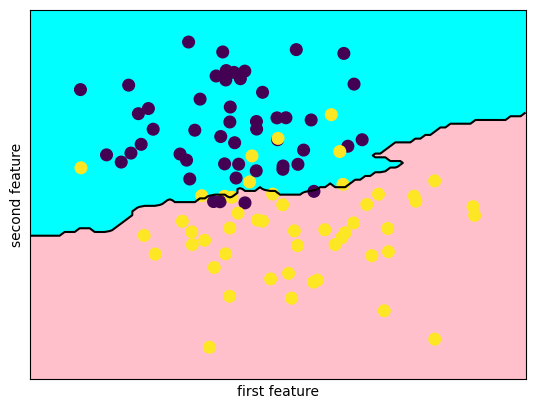

In [7]:
# Метод наивного байесовского классификатора
nb = GaussianNB()
# Обучение модели 
nb.fit(X_train, y_train)
# Оценка качества
prediction = nb.predict(X_test)
# Вывод результатов 
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)


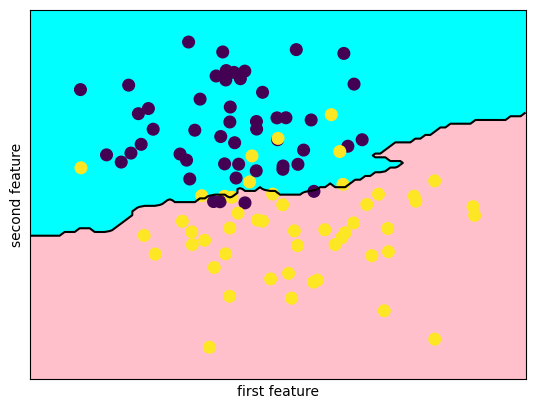

In [8]:
# Метод случайного леса (5)
rdf = RandomForestClassifier(n_estimators=5)
# Обучаем модель данных
rdf.fit(X_train, y_train)
# Оцениваем качество модели
prediction = rdf.predict(X_test)
# Выводим сводную информацию
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

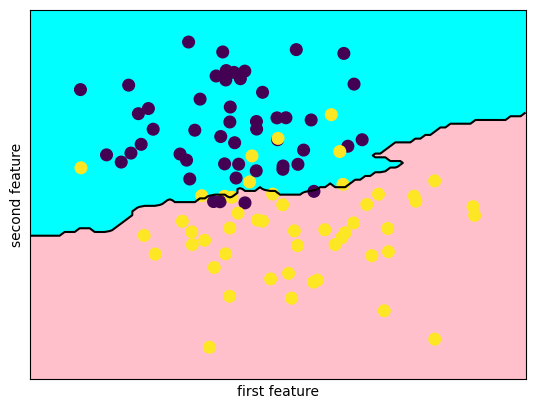

In [9]:
# Метод случайного леса (10)
rdf = RandomForestClassifier(n_estimators=10)
# Обучаем модель данных
rdf.fit(X_train, y_train)
# Оцениваем качество модели
prediction = rdf.predict(X_test)
# Выводим сводную информацию
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)


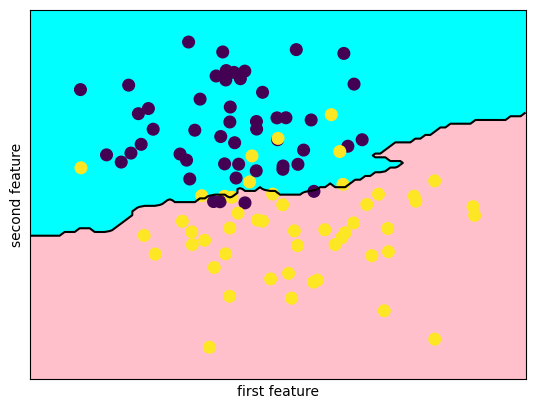

In [10]:
# Метод случайного леса (15)
rdf = RandomForestClassifier(n_estimators=15)
# Обучаем модель данных
rdf.fit(X_train, y_train)
# Оцениваем качество модели
prediction = rdf.predict(X_test)
# Выводим сводную информацию
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

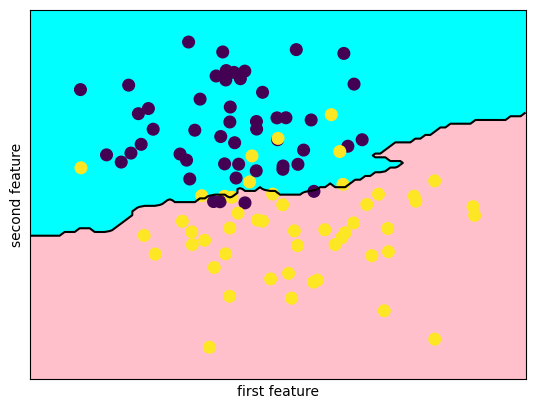

In [11]:
# Метод случайного леса (20)
rdf = RandomForestClassifier(n_estimators=20)
# Обучаем модель данных
rdf.fit(X_train, y_train)
# Оцениваем качество модели
prediction = rdf.predict(X_test)
# Выводим сводную информацию
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

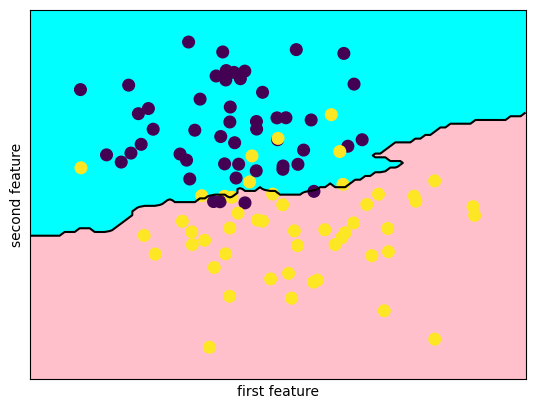

In [15]:
# Метод случайного леса (50)
rdf = RandomForestClassifier(n_estimators=50)
# Обучаем модель данных
rdf.fit(X_train, y_train)
# Оцениваем качество модели
prediction = rdf.predict(X_test)
# Выводим сводную информацию
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)